In [1]:
# Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
plt.rcParams['figure.figsize'] = [20, 8]

In [2]:
# Đọc file dữ liệu
df = pd.read_csv('../../Dataset/Palladium.csv')
df.shape

(2344, 5)

In [3]:
# Kiểm tra cột close có hàng nào null không
df['Close'].isnull().sum()

0

In [4]:
# Đưa về kiểu date và đánh index
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index(['Date'])

# Sắp xếp lại index
df = df.sort_index(ascending=True)
df = df.drop(columns=['Open', 'High', 'Low'])
df

,Close
Date,
2018-01-01,1067.5
2018-01-02,1096.0
2018-01-03,1088.0
2018-01-04,1102.5
2018-01-05,1091.5
...,...
2024-05-28,975.5
2024-05-29,968.0
2024-05-30,950.5


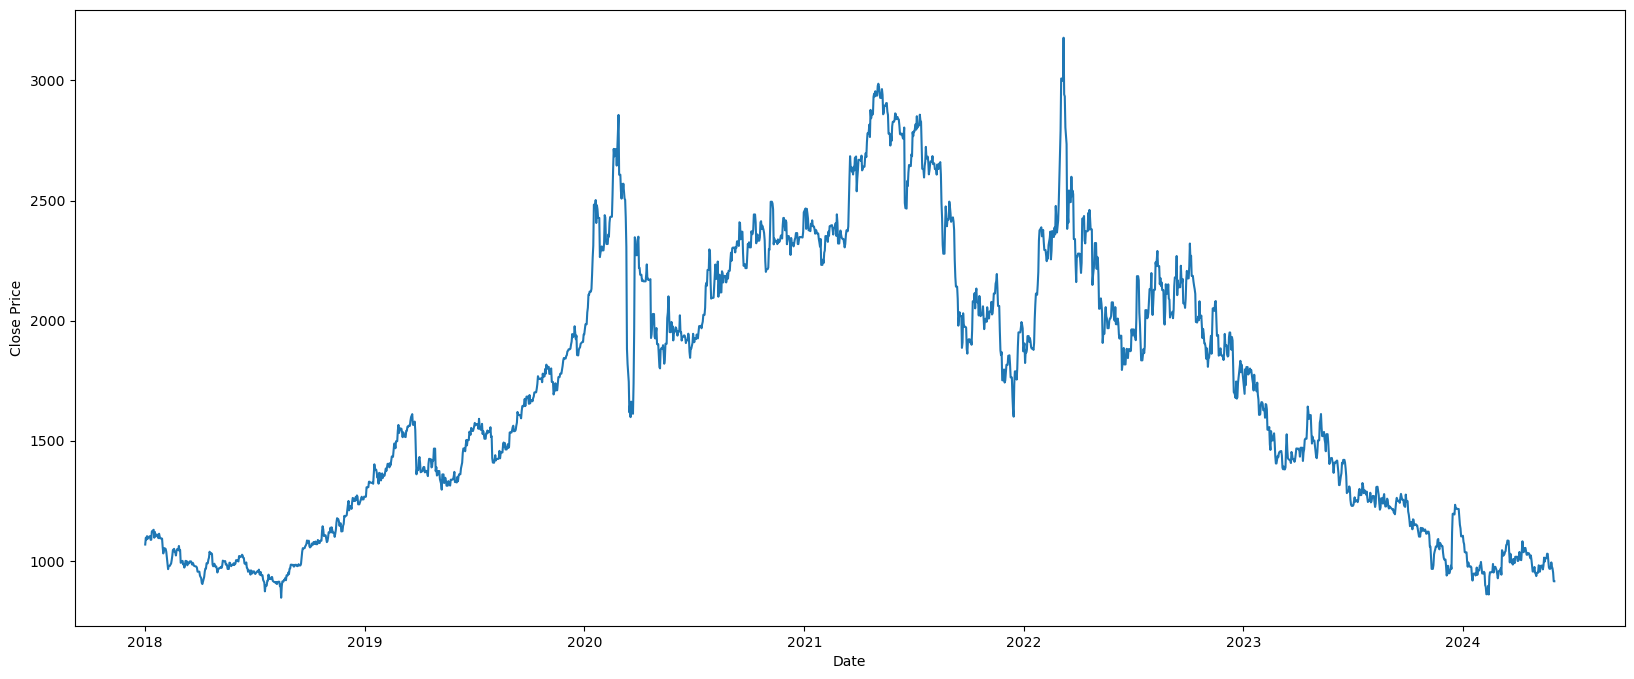

In [5]:
# Vẽ biểu đồ chuỗi thời gian
plt.plot(df)
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

In [6]:
# Số lượng ngày trước đó
steps = 90

# Tạo một DataFrame mới để lưu trữ dữ liệu
df_shift = df.copy()

# Thêm cột chứa giá trị 'Close' của steps ngày trước đó
for i in range(steps):
    df_shift[f'Close_t-{i+1}'] = df['Close'].shift(i+1)

# Loại bỏ các hàng có giá trị null
df_shift = df_shift.dropna()

In [7]:
df_shift.head(30)

,Close,Close_t-1,Close_t-2,Close_t-3,Close_t-4,Close_t-5,Close_t-6,Close_t-7,Close_t-8,Close_t-9,...,Close_t-81,Close_t-82,Close_t-83,Close_t-84,Close_t-85,Close_t-86,Close_t-87,Close_t-88,Close_t-89,Close_t-90
Date,,,,,,,,,,,,,,,,,,,,,
2018-04-01,954.500000,954.500000,954.500000,954.500000,970.500000,975.500000,976.500000,977.000000,978.000000,979.000000,...,1087.000000,1102.000000,1101.500000,1098.166667,1094.833333,1091.500000,1102.500000,1088.000000,1096.000000,1067.500000
2018-04-02,937.500000,954.500000,954.500000,954.500000,954.500000,970.500000,975.500000,976.500000,977.000000,978.000000,...,1087.500000,1087.000000,1102.000000,1101.500000,1098.166667,1094.833333,1091.500000,1102.500000,1088.000000,1096.000000
2018-04-03,932.500000,937.500000,954.500000,954.500000,954.500000,954.500000,970.500000,975.500000,976.500000,977.000000,...,1122.000000,1087.500000,1087.000000,1102.000000,1101.500000,1098.166667,1094.833333,1091.500000,1102.500000,1088.000000
2018-04-04,927.500000,932.500000,937.500000,954.500000,954.500000,954.500000,954.500000,970.500000,975.500000,976.500000,...,1124.333333,1122.000000,1087.500000,1087.000000,1102.000000,1101.500000,1098.166667,1094.833333,1091.500000,1102.500000
2018-04-05,907.500000,927.500000,932.500000,937.500000,954.500000,954.500000,954.500000,954.500000,970.500000,975.500000,...,1126.666667,1124.333333,1122.000000,1087.500000,1087.000000,1102.000000,1101.500000,1098.166667,1094.833333,1091.500000
2018-04-06,903.000000,907.500000,927.500000,932.500000,937.500000,954.500000,954.500000,954.500000,954.500000,970.500000,...,1129.000000,1126.666667,1124.333333,1122.000000,1087.500000,1087.000000,1102.000000,1101.500000,1098.166667,1094.833333
2018-04-07,912.833333,903.000000,907.500000,927.500000,932.500000,937.500000,954.500000,954.500000,954.500000,954.500000,...,1096.000000,1129.000000,1126.666667,1124.333333,1122.000000,1087.500000,1087.000000,1102.000000,1101.500000,1098.166667
2018-04-08,922.666667,912.833333,903.000000,907.500000,927.500000,932.500000,937.500000,954.500000,954.500000,954.500000,...,1120.000000,1096.000000,1129.000000,1126.666667,1124.333333,1122.000000,1087.500000,1087.000000,1102.000000,1101.500000
2018-04-09,932.500000,922.666667,912.833333,903.000000,907.500000,927.500000,932.500000,937.500000,954.500000,954.500000,...,1101.500000,1120.000000,1096.000000,1129.000000,1126.666667,1124.333333,1122.000000,1087.500000,1087.000000,1102.000000


In [8]:
# Chia train test theo tỉ lệ
train_size = int(0.6 * len(df_shift))
test_size = len(df_shift) - train_size

train_data = df_shift[:train_size]
test_data = df_shift[train_size:]

In [9]:
# Chia các tập x,y train, test tương ứng
x_train = train_data.iloc[:, 1:]
y_train = train_data['Close']

x_test = test_data.iloc[:, 1:]
y_test = test_data['Close']

In [10]:
# Quá trình training
# Fit mô hình với các tham số tốt nhất được tìm kiếm
model = RandomForestRegressor(min_samples_leaf = 4, min_samples_split = 10, max_depth = int(steps/3), n_estimators = 200)

# Fit model
model.fit(x_train, y_train)

RandomForestRegressor(max_depth=30, min_samples_leaf=4, min_samples_split=10,
                      n_estimators=200)

In [11]:
# Quá trình testing 
y_pred = model.predict(x_test)

In [12]:
# Tính MSE - Mean Squared Error - Sai số bình phương trung bình
test_mse = mean_squared_error(y_test, y_pred) 
print('Testing MSE:', test_mse)

# Tính RMSE - Root Mean Squared Error - Sai số bình phương trung bình
test_rmse = math.sqrt(test_mse)
print('Testing RMSE:', test_rmse)

# Tính MAPE - Mean Absolute Percentage Error - Tỷ lệ phần trăm sai số tuyệt đối trung bình
test_mape = mean_absolute_percentage_error(y_test, y_pred)
print('Testing MAPE:', test_mape)

Testing MSE: 4506.977098865487
Testing RMSE: 67.13402340740116
Testing MAPE: 0.03292749012149547


In [13]:
# Tạo hàm dự đoán
def predict_future(model, df_shift, predict_days, steps):
    df_predict = df_shift.copy()
    for i in range(predict_days):
        new_row = {}
        # Tạo dòng mới với close là nan
        date = df_predict.index[-1] + pd.DateOffset(days=1)
        new_row['Close'] = np.nan
        
        # Gán các giá trị t-1 đến t-steps
        for j in range(steps):
            new_row[f'Close_t-{j+1}'] = df_predict['Close'].iloc[-j -1]
    
        # Thêm dòng mới vào df
        df_predict.loc[date] = new_row
    
        # Dự đoán cho giá trị tiếp theo
        x_next = df_predict.iloc[-1, 1:].to_frame().T
        y_next = model.predict(x_next)
        df_predict.at[df_predict.index[-1], 'Close'] = y_next[0]
    return df_predict

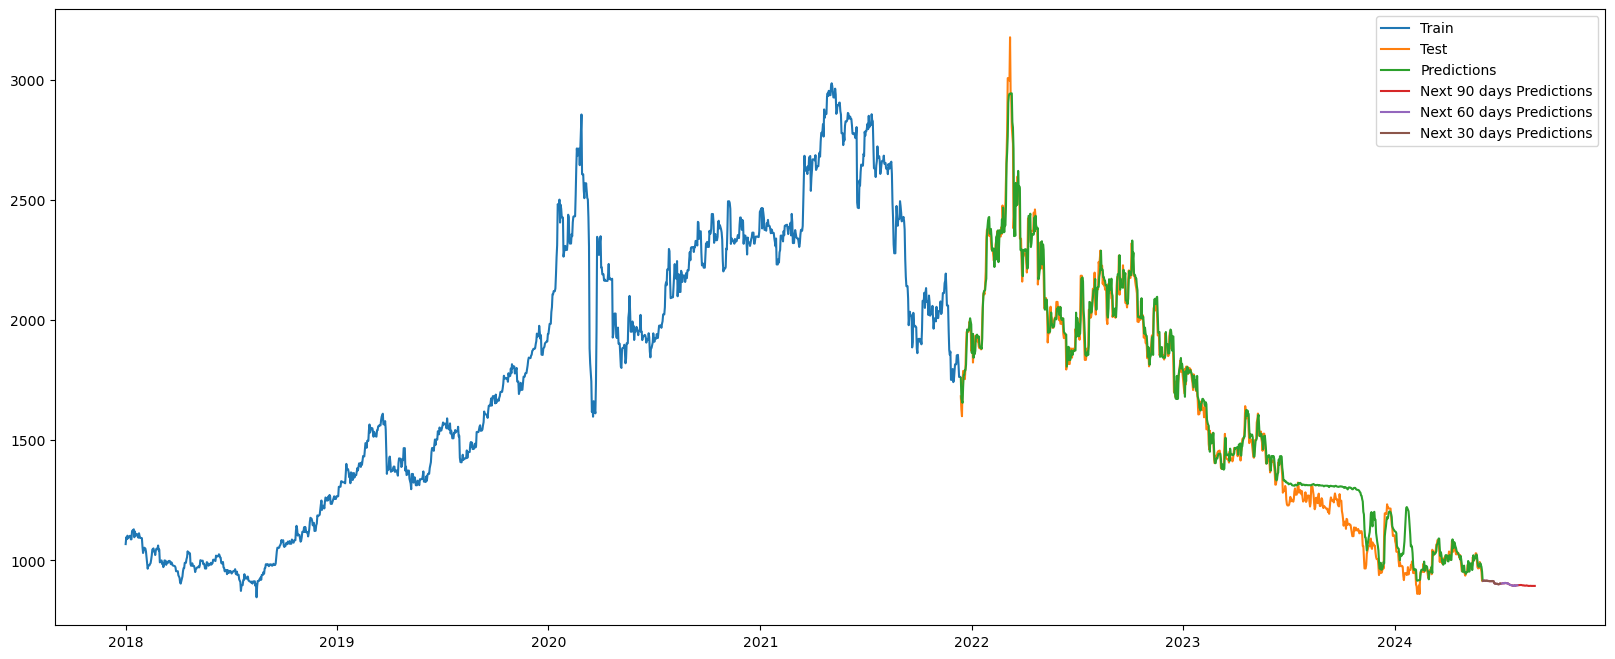

In [14]:
# Dự đoán 30, 60, 90 ngày tiếp theo

# Lấy predict_data và y_pred_next của 30 ngày
predict_days = 30
df_predict_30 = predict_future(model, df_shift, predict_days, steps)
predict_data_30 = df_predict_30.tail(predict_days)
y_pred_next_30 = predict_data_30['Close']

# Lấy predict_data và y_pred_next của 60 ngày
predict_days = 60
df_predict_60 = predict_future(model, df_shift, predict_days, steps)
predict_data_60 = df_predict_60.tail(predict_days)
y_pred_next_60 = predict_data_60['Close']

# Lấy predict_data và y_pred_next của 90 ngày
predict_days = 90
df_predict_90 = predict_future(model, df_shift, predict_days, steps)
predict_data_90 = df_predict_90.tail(predict_days)
y_pred_next_90 = predict_data_90['Close']

# Vẽ hình
plt.plot(df[:train_size + steps].index, df[:train_size + steps].Close)
plt.plot(test_data.index, y_test)
plt.plot(test_data.index, y_pred)
plt.plot(predict_data_90.index, y_pred_next_90)
plt.plot(predict_data_60.index, y_pred_next_60)
plt.plot(predict_data_30.index, y_pred_next_30)
plt.legend(['Train', 'Test', 'Predictions', 'Next 90 days Predictions', 'Next 60 days Predictions', 'Next 30 days Predictions'])
plt.show()